In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")

In [3]:
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])

In [4]:
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")

In [5]:
daily_df["money_per_trd"] = daily_df["total_turnover"] / daily_df["num_trades"]
daily_df["ret_pct"] = daily_df.groupby("order_book_id")["close"].pct_change()

In [6]:
mom_skew = -(close_df / open_df -1).rolling(20).skew().shift(1)

In [7]:
mom_skew.to_parquet("./mom_skew.parquet")

In [8]:
import performance as perf
import utils 
import tears
import plotting

In [9]:
ftr_stack = utils.get_clean_factor_and_forward_returns(mom_skew, close_df, quantiles=10, periods=(5,10,20))

Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,5D,10D,20D
IC Mean,0.033,0.034,0.034
IC Std.,0.065,0.064,0.063
IC_IR,0.503,0.539,0.534
t-stat(IC),17.806,19.084,18.927
p-value(IC),0.000,0.000,0.000
IC Skew,1.465,1.300,0.738
IC Kurtosis,9.179,6.728,5.137


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,5D,10D,20D
Quantile 1 Mean Turnover,0.452,0.658,0.895
Quantile 2 Mean Turnover,0.671,0.801,0.893
Quantile 3 Mean Turnover,0.749,0.840,0.895
Quantile 4 Mean Turnover,0.785,0.859,0.897
Quantile 5 Mean Turnover,0.800,0.866,0.899
Quantile 6 Mean Turnover,0.803,0.868,0.899
Quantile 7 Mean Turnover,0.795,0.862,0.898
Quantile 8 Mean Turnover,0.772,0.851,0.896
Quantile 9 Mean Turnover,0.707,0.819,0.894
Quantile 10 Mean Turnover,0.487,0.683,0.889


,5D,10D,20D
Mean Factor Rank Autocorrelation,0.667,0.41,0.033


<Figure size 640x480 with 0 Axes>

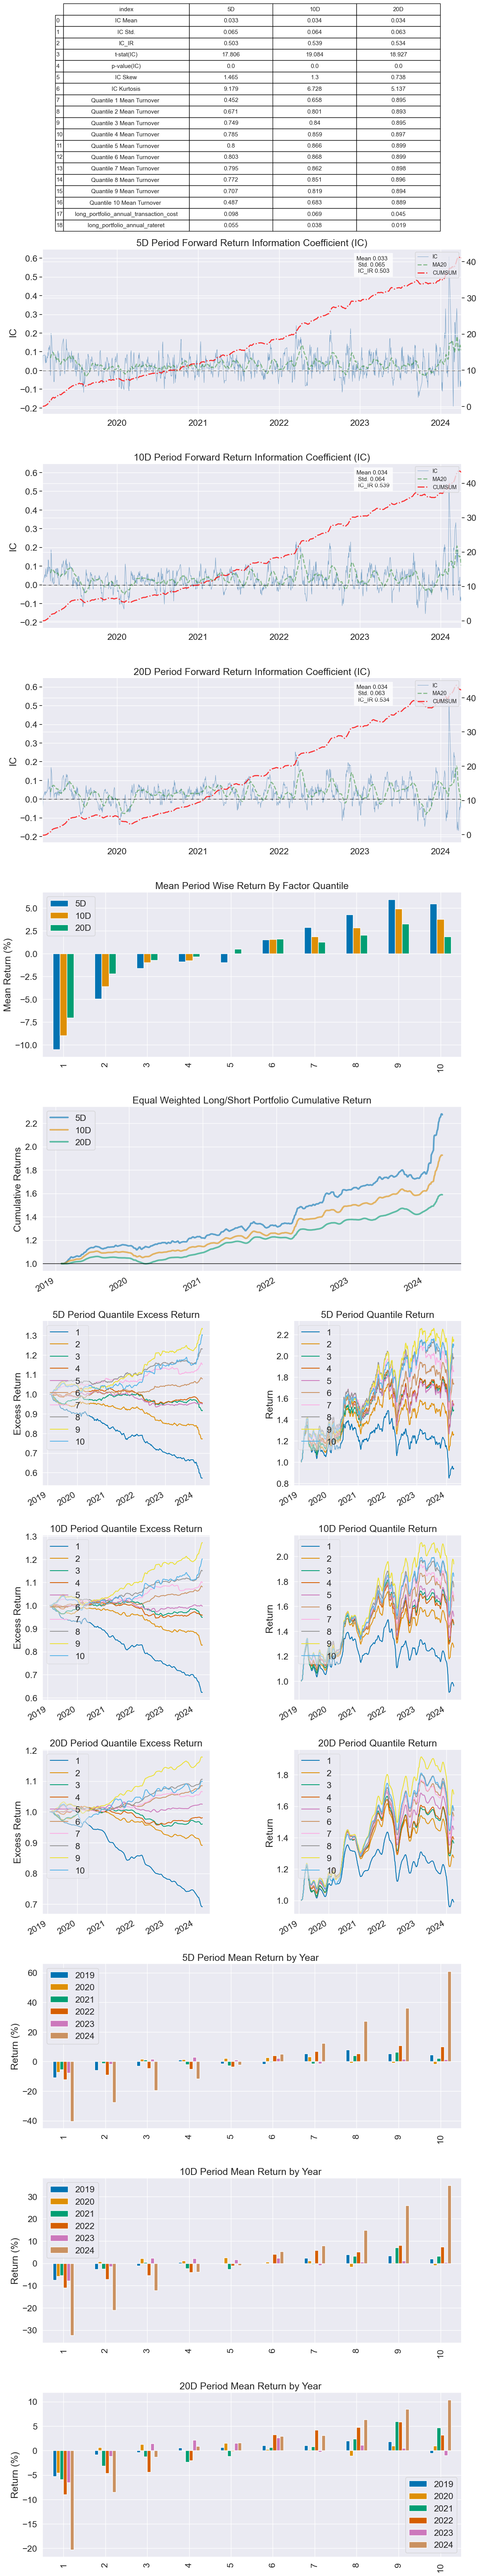

In [10]:
tears.create_summary_tear_sheet(ftr_stack, file_path ="./mom_skew/")